<a href="https://colab.research.google.com/github/sarahnolan15/APA-Project-/blob/main/ccrush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 

In [1]:
import pandas as pd 
df = pd.read_csv('candy_crush.csv')
df

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False


# Data Pre-processing

In [2]:
df.head()

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True


In [3]:
df.dtypes
#int64 and object

user_id           int64
gate              int64
gamerounds_sum    int64
retention_day      bool
retention_week     bool
dtype: object

In [4]:
#check for missing data
df.isna().sum()
#one NaN found in columns retention day and retention week

user_id           0
gate              0
gamerounds_sum    0
retention_day     0
retention_week    0
dtype: int64

In [5]:
#change to type boo
df['retention_week'] = df['retention_week'].astype('bool')
print(df['retention_week'].dtype)

bool


In [6]:
df['retention_day'] = df['retention_day'].astype('bool')
print(df['retention_day'].dtype)

bool


In [7]:
df.dtypes

user_id           int64
gate              int64
gamerounds_sum    int64
retention_day      bool
retention_week     bool
dtype: object

In [8]:
df

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False


# One Day Retention Rate

In [9]:
#find the number of users who played and didnt play of the first day
df['retention_day'].value_counts()

False    50036
True     40153
Name: retention_day, dtype: int64

In [10]:
#find the number of users who played and didnt play of the first week
df['retention_week'].value_counts()

False    73408
True     16781
Name: retention_week, dtype: int64

In [11]:
#find the one day retention rate for Group A
#get the data to only incude rows where gate = 30
gate_30_data = df[df['gate'] == 30]

#calculate the one day retention rate for gate 30
day_retention_A = gate_30_data['retention_day'].mean() * 100

print(f"The one day retention rate for Group A is {day_retention_A:.2f}%.")

The one day retention rate for Group A is 44.82%.


In [12]:
#find the one day retention rate for Group B
#get the data to only incude rows where gate = 50
gate_30_data = df[df['gate'] == 50]

#calculate the day retention rate for gate 50
day_retention_B = gate_30_data['retention_day'].mean() * 100

print(f"The one day retention rate for Group B is {day_retention_B:.2f}%.")

The one day retention rate for Group B is 44.23%.


# Identifying Differences

In [13]:
#find the number of game rounds played for Group A
game_rounds_A = df[(df['gate'] == 30) & (df['retention_day'] == True)]['gamerounds_sum'].mean()
print(f"Average game rounds played for Group A: ", game_rounds_A)

Average game rounds played for Group A:  94.41170010981332


In [14]:
#find the number of game rounds played for Group B
game_rounds_B = df[(df['gate'] == 50) & (df['retention_day'] == True)]['gamerounds_sum'].mean()
print(f"Average game rounds played for Group B: ", game_rounds_B)

Average game rounds played for Group B:  95.3811819672946


# Probability of Differences 

In [15]:
#find the probability of differences between Group A and Group B occuring
from scipy.stats import ttest_ind
from scipy.stats import stats
#calculate p-value for the two groups
p_value = stats.ttest_ind(df.loc[df['gate'] == 30, 'retention_day'].dropna(),
                          df.loc[df['gate'] == 50, 'retention_day'].dropna())[1]

print(f"p-value: {p_value:.4f}")

p-value: 0.0744


<ipython-input-15-0fe8a448e1cc>:5: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  p_value = stats.ttest_ind(df.loc[df['gate'] == 30, 'retention_day'].dropna(),


# One Week Retention Rate

In [16]:
#find the one day retention rate for Group A
#get the data to only include rows where gate is 30
gate_30_data = df[df['gate'] == 30]

# alculate the week retention rate for gate 30
week_retention_A = gate_30_data['retention_week'].mean() * 100

print(f"The one week retention rate for Group A is {week_retention_A:.2f}%.")

The one week retention rate for Group A is 19.02%.


In [17]:
#find the one day retention rate for Group A
#get the data to only include rows where gate is 50
gate_30_data = df[df['gate'] == 50]

#calculate the week retention rate for gate 30
week_retention_B = gate_30_data['retention_week'].mean() * 100

print(f"The one week retention rate for Group B is {week_retention_B:.2f}%.")

The one week retention rate for Group B is 18.20%.


# Percent of Returning Players

In [18]:
#calculate the percentage of returning players for Group A
#get the unique user ids for retention day and gate 30
one_day_users = set(df.loc[(df['retention_day'] == True) & (df['gate'] == 30), 'user_id'])

#get the unique user ids for retention week and gate 30
one_week_users = set(df.loc[(df['retention_week'] == True) & (df['gate'] == 30), 'user_id'])

#gind the intersection 
repeat_players = one_day_users.intersection(one_week_users)

#calculate the percentage of users that are also in the intersection
percent_A = len(repeat_players) / len(one_day_users) * 100

print(f"Percentage of players who played on day one and played again in week one for Group A: {percent_A:.2f}%")

Percentage of players who played on day one and played again in week one for Group A: 33.32%


In [19]:
#calculate the percentage of returning players for Group B
day1_users = set(df.loc[(df['retention_day'] == True) & (df['gate'] == 50), 'user_id'])
week1_users = set(df.loc[(df['retention_week'] == True) & (df['gate'] == 50), 'user_id'])
repeat_players = day1_users.intersection(week1_users)
percent_B = len(repeat_players) / len(day1_users) * 100
print(f"Percentage of players who played on day one and played again in week one for Group B: {percent_B:.2f}%")

Percentage of players who played on day one and played again in week one for Group B: 32.34%


In [20]:
#calculate the percentage of returning players for the average
day1_users = set(df.loc[(df['retention_day'] == True), 'user_id'])
week1_users = set(df.loc[(df['retention_week'] == True), 'user_id'])
repeat_players = day1_users.intersection(week1_users)
percent_avg = len(repeat_players) / len(day1_users) * 100
print(f"Percentage of players who played on day one and played again in week one on average: {percent_avg:.2f}%")

Percentage of players who played on day one and played again in week one on average: 32.83%


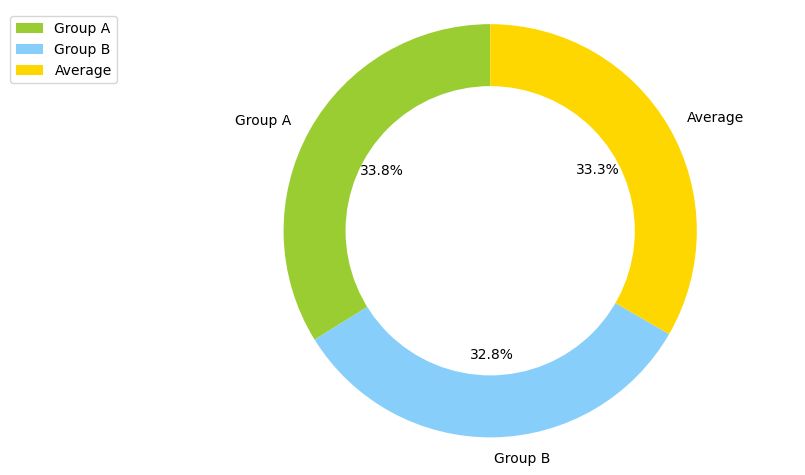

In [21]:
import matplotlib.pyplot as plt

labels = ['Group A', 'Group B', 'Average']
sizes = [percent_A, percent_B, percent_avg]
colors = ['yellowgreen', 'lightskyblue', 'gold']
explode = (0, 0, 0) 

total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.legend(labels, loc='upper right', bbox_to_anchor=(-0.1, 1.), fontsize=10)
plt.show()


# Compare the Retention Rates

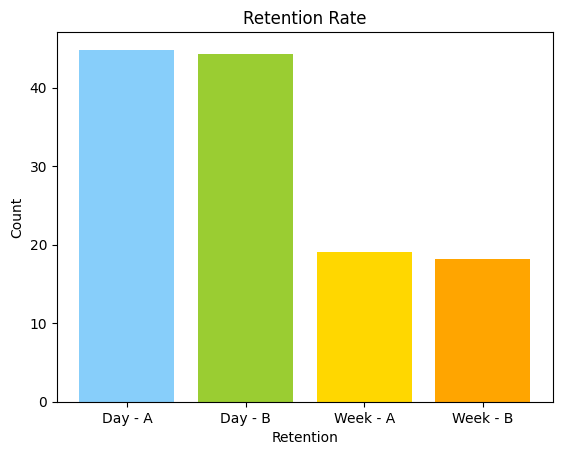

In [22]:
import matplotlib.pyplot as plt

x = ['Day - A', 'Day - B', 'Week - A', 'Week - B']
y = [day_retention_A, day_retention_B, week_retention_A, week_retention_B]

plt.bar(x, y)
colors = ['lightskyblue', 'yellowgreen', 'gold', 'orange']
plt.xlabel('Retention')
plt.ylabel('Count')
plt.title('Retention Rate')
plt.bar(x, y, color=colors)
plt.show()


# The Lift

In [23]:
#calculate the lift of one day retention
import numpy as np
#calcuate the mean  
a_mean = np.mean(day_retention_A) #contol
b_mean = np.mean(day_retention_B) #treatment
    
#calculate the lift using a_mean and b_mean
lift = (b_mean-a_mean)/a_mean
  
# Print lift() with control and personalization as inputs
print(lift)

-0.013175655859746541


In [24]:
#calculate the lift of one week retention
# Calcuate the mean  
a_mean = np.mean(week_retention_A) #contol
b_mean = np.mean(week_retention_B) #treatment
    
# Calculate the lift using a_mean and b_mean
lift = (b_mean-a_mean)/a_mean
print(lift)

-0.043119034896460046
